# CUSTOMER CHURN PREDICTION
![alt text](download-1.png)

## Introduction
Customer churn,or the loss of customers over time, is a critical challenge for subscription-based businesses.For stakeholders such as marketing teams, customer retention specialists, and business managers, the ability to predict and mitigate churn is invaluable.The implication is that high churn rates not only reduce revenue but also elevate customer acquisition costs, which makes customer retention important. This project solves the problem by employing machine learning algorithms in the prediction of churn so that companies can adopt the necessary strategies to retain customers and enhance their satisfaction.This project addresses the issue by predicting churn using machine learning techniques, enabling companies to take proactive measures to retain customers and improve their overall experience.
Using the Telco Customer Churn Dataset, I'll examine customer demographics, service usage, and billing information to build predictive models. These models aim to not only forecast churn but also uncover patterns and key drivers of customer behavior. This combination of prediction and insight forms the foundation for targeted retention strategies that improve business outcomes.


## Business Understunding
- In subscription-based businesses, retaining customers is essential for sustained profitability. When customers leave, it doesn’t just affect current revenue,it also drives up the cost of acquiring new ones. By identifying the reasons behind customer churn and accurately predicting it, businesses can:Concentrate efforts on high-risk customers and implement targeted retention strategies, Create personalized experiences that address the specific needs of at-risk customers,Reduce the financial impact of churn while building stronger, long-term relationships with their customers.
- This project aims to achieve these objectives by using data-driven insights and predictive models to address churn effectively, ensuring both customer satisfaction and business growth.

### Problem Statement
The company is experiencing customer churn, with a significant number of customers opting out of their subscription services. Understanding the factors that contribute to churn and accurately predicting which customers are likely to churn are essential for designing retention strategies.

**Objectives:**
1. To identify the most significant factors driving customer churn
2. To accurately predict customers likely to churn using a data-driven model.
3. To identify predictive models can best forecast customer churn.
- The model's **metric of success** will be measured by its ability to identify churn cases (Recall) with a target threshold of 80%. Additionally, an F1-score of at least 0.75 and an ROC-AUC above 0.80 will indicate a balance between precision and recall and robust model performance. The ultimate success metric is a measurable reduction in churn rate and improved ROI on retention efforts informed by the model’s predictions.

## Data Understanding
- customerID - unique value identifying customer
- gender - whether the customer is a male or a female
- SeniorCitizen - whether the customer is a senior citizen or not (1, 0)
- Partner - whether the customer has a partner or not (Yes, No)
- Dependents - whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
- tenure - number of months the customer has stayed with the company
- PhoneService - whether the customer has a phone service or not (Yes, No)
- MultipleLines - whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - type of contract according to duration (Month-to-month, One year, Two year)
- PaperlessBilling - bills issued in paperless form (Yes, No)
- PaymentMethod - payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
- MonthlyCharges - amount of charge for service on monthly bases
- TotalCharges - cumulative charges for service during subscription (tenure) period

In [1278]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler



In [1233]:
#Loading The dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [1234]:
#Looking at the 5 first rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [1236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**
- By Using the Info function We Can See the Count Of Columns And Rows DataType Of Data And Missing Values. In The Data, 2 Columns Are of Int datatype And 1 Float Datatype And 18 Are Object Datatype .
- There are Data 7043 Rows And 21 Columns .


## Data Preparation

In [1237]:
#Converting the TotalCharges columns from object to integer
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [1238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1239]:
#Checking for missing values in TotalChares Column
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There are 11 missing values in the TotalCharges Column
- Next I will explore the distributions of the numerical columns so as to understand their trends

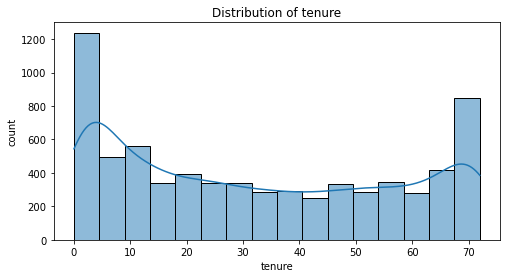

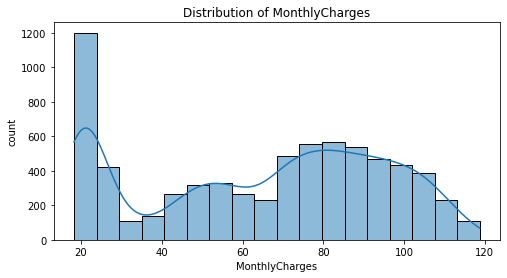

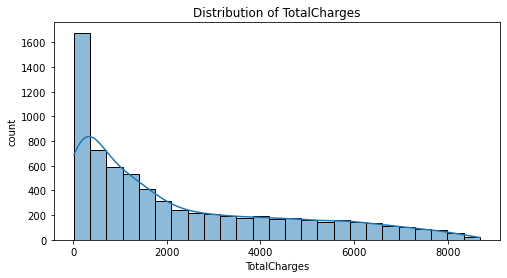

In [1240]:
#Checking the distribution of numerical columns
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in num_cols:
   plt.figure(figsize=(8,4))
   sns.histplot(data=df, x=col, kde=True)
   plt.title(f'Distribution of {col}')
   plt.xlabel(col)
   plt.ylabel('count')
   plt.show()

**Observation:** 
- Both the distribution of tenure and MonthlyCharges have a bimodal distribution
- The TotalCharges column is skewed to the right 

In [1241]:
#Filling the missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1242]:
#Dropping Irelevant columns
df = df.drop(['customerID'], axis=1)

## Exploratory Data Analysis
### Visualizations
1. **Categorical Data**

*Step 1:* Dividing the categorical data into three parts:
1. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
2. Demographic information - gender, age range, and if they have partners and dependants.
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

In [1243]:
demographic_cols = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services_cols = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]
accounts_cols = ["Contract", "PaperlessBilling", "PaymentMethod"]

*step 2:* Visualizing each feature and it's relationship to Churn rate.
 - **Demographic Features**

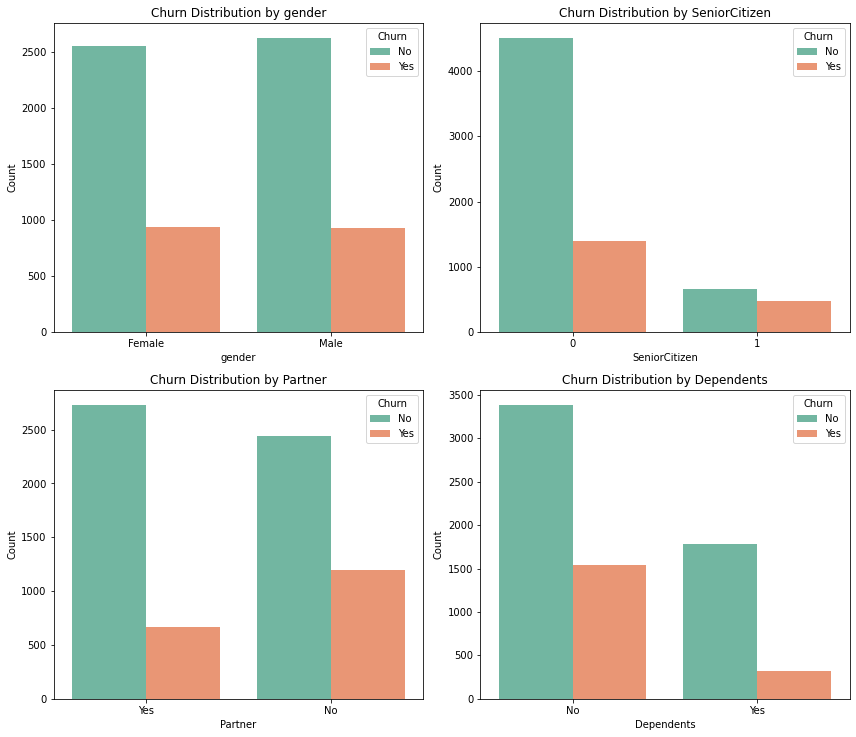

In [1244]:
n_cols = len(demographic_cols)
# Creating subplots with a suitable layout
fig, axes = plt.subplots(nrows=(n_cols // 2) + 1, ncols=2, figsize=(12,5 * ((n_cols // 2) + 1)))
# Flattenning axes for easy indexing if there's more than one row
axes = axes.flatten()
# Looping through demographic columns and create a count plot for each
for i, col in enumerate(demographic_cols):
    sns.countplot(ax=axes[i], x=col, hue="Churn", data=df, palette="Set2")
    axes[i].set_title(f"Churn Distribution by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn", loc="upper right")
# Hide unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

*Observations:* 
- Gender: churn is evenly distributed across genders hence it may not significantly affect churn.
- SeniorCitizen: There is a high churn rate among senior citizens.
- Partner: Customers without partners churn more frequently, potentially reflecting economic or social factors.
- Dependents: Customers with dependents have lower churn due to family-driven financial commitments compared with customers with no dependents.

*Recommendations*
- Tailor services for senior citizens, such as offering senior-friendly plans or discounts.
- Investigate factors influencing churn among single or non-dependent customers.


- **Service Features**

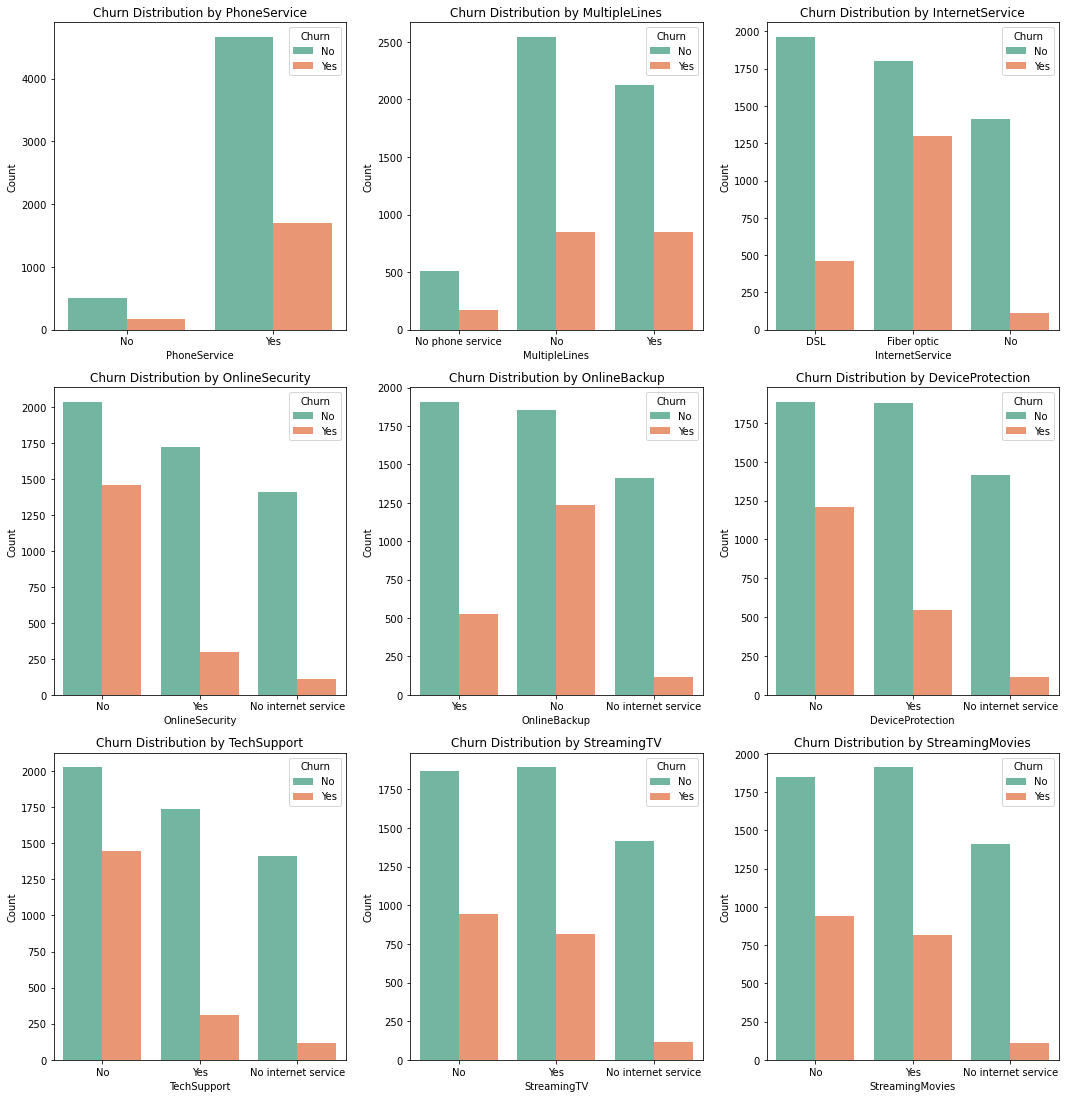

In [1245]:
n_cols = len(services_cols)
# Create subplots with a suitable layout
fig, axes = plt.subplots(nrows=(n_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((n_cols // 3) + 1)))
# Flatten axes for easy indexing if there's more than one row
axes = axes.flatten()
# Loop through demographic columns and create a count plot for each
for i, col in enumerate(services_cols):
    sns.countplot(ax=axes[i], x=col, hue="Churn", data=df, palette="Set2")
    axes[i].set_title(f"Churn Distribution by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn", loc="upper right")
# Hide unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

*Observations*
- PhoneService and MultipleLines:churn rate is higher for customers with phone service and without multiple lines.
- InternetService: Customers with fiber optic internet service hace a higher churn rate.
- OnlineSecurity and TechSupport: Customers lacking security or technical support services show higher churn rates.
- StreamingTV/Movies: Customers not streaming TV/movies have a higher churn rate.

*Recommendations:*
- Promote value-added services like bundling streaming with tech support.
- Offer targeted retention campaigns for customers without OnlineSecurity or TechSupport.

- **Account Information Features**

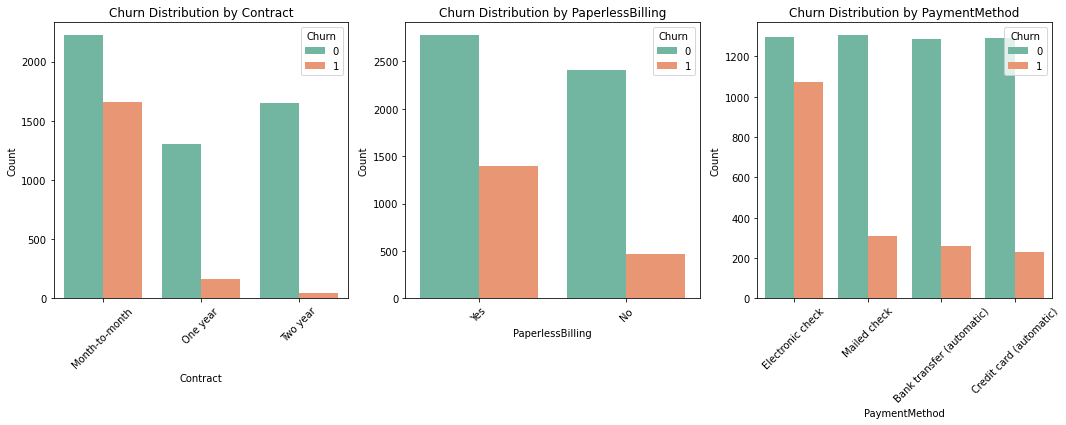

In [1288]:
n_cols = len(accounts_cols)
fig, axes = plt.subplots(nrows=(n_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((n_cols // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(accounts_cols):
    sns.countplot(ax=axes[i], x=col, hue="Churn", data=df, palette="Set2")
    axes[i].set_title(f"Churn Distribution by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn", loc="upper right")
    axes[i].tick_params(axis='x', rotation=45) 
# Hide unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

*Observation:*
- Contract: Long-term contract customers churn less, indicating stability.
- PaperlessBilling: Higher churn rates among paperless billing users suggest dissatisfaction with digital systems.
- PaymentMethod: electronic check users churn more as compared to other payment methods.

2. **Numerical Columns**

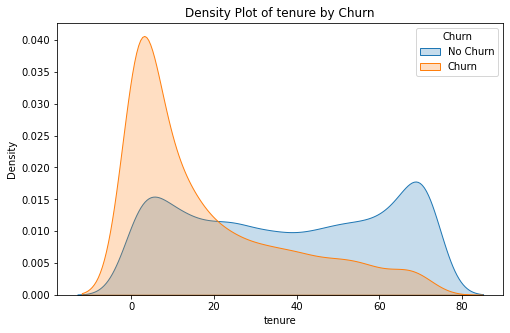

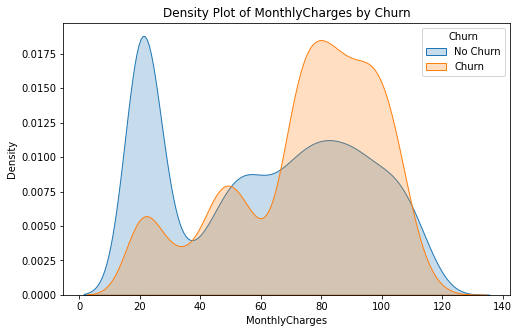

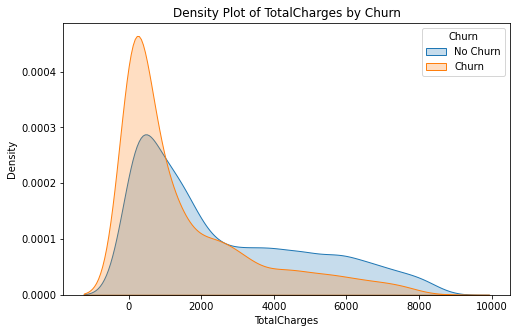

In [1247]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df[df['Churn'] == 'No'], x=col, label='No Churn', shade=True)
    sns.kdeplot(data=df[df['Churn'] == 'Yes'], x=col, label='Churn', shade=True)
    plt.title(f"Density Plot of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Churn")
    plt.show()

*Observation*
- Customers with lower tenure have significantly higher churn rates.
The KDE plot shows a concentration of churn for customers with very short tenure.
- Customers with higher monthly charges tend to churn more frequently.
The KDE plot shows a clear divergence, with churned customers concentrated at higher monthly charge ranges.
- There is a higher churn rate for customers with low Total Charges.


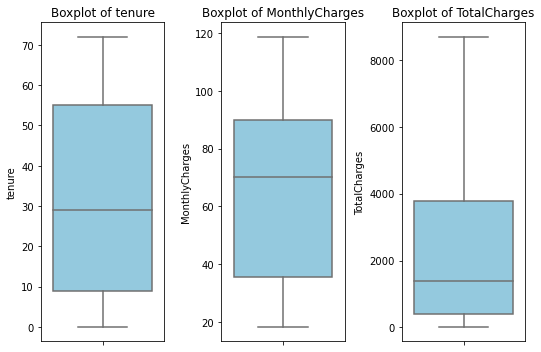

In [1248]:
#To investigate outliers, I will plot boxplots for numerical columns
plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)  # Create subplots for each column
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Observation**
- There are no outliers. This was important since abnormally large values would affect scaling.

### Correlation Analysis between Numerical Features
This is to examine the correlation between numerical features and the target variable 'Churn' to identify relationships.

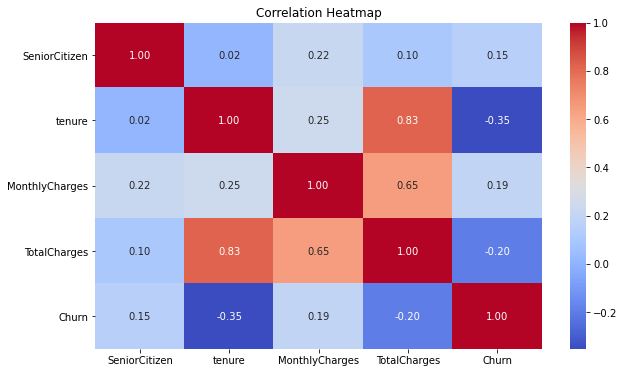

In [1249]:
# Calculating the correlation between numerical features and target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
correlation = df.corr()['Churn'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

***Observation***
- tenure has a moderate negative correlation with churn (-0.35), indicating that customers with longer tenure are less likely to churn. Conversely, MonthlyCharges shows a weak positive correlation (0.19) with churn, suggesting that higher monthly charges may slightly increase the likelihood of churn. "SeniorCitizen" has a very weak positive correlation (0.15) with churn, implying a minimal relationship. Overall, the correlations suggest that tenure may be a significant predictor of churn, while other numerical features have weaker relationships.

## Data Preprocessing

In [1250]:
#Identifying the features and Labels
X = df.drop('Churn', axis=1)
y = df['Churn']

In [1251]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=42)

In [1252]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64','float']).columns

In [1253]:
#Standardizing numerical features 
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]))
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]))


- I decided to use StandardScaler(), which standardises features by subtracting the mean and dividing by the standard deviation. This transformation results in features with zero mean and unit variance.

In [1254]:
#OneHotEncoding the categorical variables
encoder=OneHotEncoder()
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]).toarray())
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]).toarray())

In [1255]:
#Combining the datasets
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,0,1,2,3
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.436831,0.881078,0.195927,0.653962
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.436831,-1.284263,0.522755,-0.975728
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.436831,-0.793997,-1.509551,-0.896617
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.289215,-0.344587,1.053643,-0.011506
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.289215,-1.079985,0.308740,-0.812139


## Modeling

In [1287]:
# Simple Logistic Regression Baseline
baseline_model = LogisticRegression(max_iter=1000,random_state=42)
baseline_model.fit(X_train_final, y_train)
y_pred_baseline = baseline_model.predict(X_test_final)
y_pred_proba_baseline = baseline_model.predict_proba(X_test_final)[:, 1]

# Evaluate Baseline Model
print("Baseline Model - Logistic Regression")
print(classification_report(y_test, y_pred_baseline))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_baseline)}")

Baseline Model - Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

ROC-AUC: 0.858815964934921


- Using Cross Validation

In [1256]:
#Defining models
models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
]
#Defining Scoring metrics
metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]


In [1257]:
scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = cross_validate(model, X_train_final, y_train, cv=5, 
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
# Sorting and styling DataFrame
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,LogisticRegression,80.300000,65.600000,52.700000,58.400000
1,RandomForestClassifier,78.500000,62.200000,46.600000,53.300000
2,DecisionTreeClassifier,72.800000,48.300000,48.800000,48.500000


- Cross-validation is essential for evaluating machine learning models as it ensures robust assessment of their generalizability by splitting the dataset into multiple folds, enabling training and testing on different portions of data. By using metrics like accuracy, precision, recall, and F1-score, cross-validation provides a comprehensive understanding of model performance, ensuring fair comparisons and reducing the risk of overfitting or underfitting. 
- I used cross-validation to evaluate multiple models like Logistic Regression, Decision Tree, and Random Forest and rank them based on averaged performance metrics across folds. This approach maximizes dataset utilization, mitigates bias-variance issues, and highlights the best model for the task while providing insights into specific performance trade-offs through metrics like precision and recall, all in a reliable and interpretable framework.

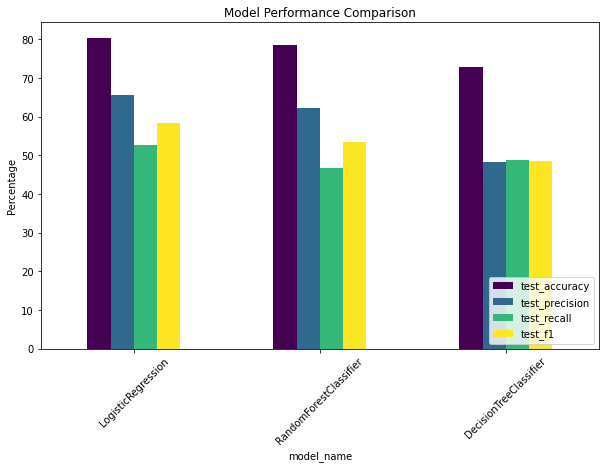

In [ ]:
#Plotting the performance of each model
model_metrics.set_index("model_name").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.savefig("model_comparison.png")  # Save as image
plt.show()

*Observation:*

Each model exhibits a distinct performance in terms of accuracy, precision, recall, and F1-score.
There is a noticeable gap between accuracy and recall across all models, indicating that while the models are performing well overall, they may struggle to capture true positives effectively (especially for churn).

## Evaluation
### 1. ROC Curve

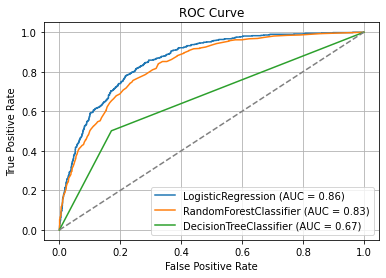

In [1281]:
# Variables to track the best model
best_model = None
best_roc_auc = 0
for model in models:  # Iterating over the list of models
    model_name = model.__class__.__name__  
    model.fit(X_train_final, y_train)  
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]  

    # Calculating ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
     # Update the best model
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model = model

    # Plotting the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Observations Based on the Results:**
 - *ROC-AUC Comparison:*

The ROC-AUC scores indicate how well each model distinguishes between churn and non-churn classes:
Logistic Regression achieved the highest ROC-AUC of 0.86, showing strong performance in differentiating between the classes.
Random Forest followed closely with a ROC-AUC of 0.83, demonstrating comparable performance.
Decision Tree had the lowest ROC-AUC of 0.67, indicating weaker discriminatory power.
 - *Overall Accuracy:*

Logistic Regression and Random Forest had comparable accuracies around 80% and 78.6%, respectively.
Decision Tree lagged with an accuracy of 73.1%, suggesting it is more prone to overfitting or lacking sufficient complexity to generalize well.
Class-Specific Metrics:

Logistic Regression and Random Forest performed well for the non-churn class (class 0), with high precision and recall. However, they struggled to predict the churn class (class 1) accurately.
The Decision Tree model showed lower precision and recall for the churn class, highlighting its limited effectiveness for this task.
 - *Key Trade-offs:*

Logistic Regression is simpler and interpretable while maintaining strong predictive performance.
Random Forest adds robustness and performs similarly, but its complexity might make it less interpretable.
Decision Tree has the lowest performance but may be useful for explaining decision-making processes due to its visual interpretability.
- *Best Model:*

Based on ROC-AUC and overall performance metrics, Logistic Regression is the preferred model for this dataset, closely followed by the Random Forest model. Decision Tree is less suitable for this task given its lower performance.

### 2. Confusion Matrix

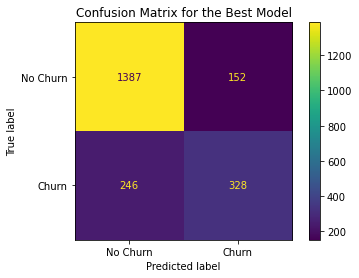

In [1283]:
# Generate predictions and confusion matrix
y_pred = best_model.predict(X_test_final)
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion Matrix for Logistic Regression
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for the Best Model')
plt.show()

**Observation:**
- The matrix shows more data points in the "No Churn" category (true negatives + false positives) than in the "Churn" category (true positives + false negatives), indicating a class imbalance, which is common in churn prediction tasks.
- TN = 1387: The model correctly identifies 1380 customers as "No Churn."
- FP = 152: However, 152 customers are falsely flagged as "Churn." These false positives may result in unnecessary retention strategies for customers who were not at risk.
- TP = 328: The model correctly identifies 328 churners, which is critical for initiating retention efforts.
- FN = 245: However, the model misses 246 churners, which is a significant concern as these customers may leave without being targeted for retention.

***Business Implication***
- False negatives are costly in churn prediction because missed churners mean lost revenue and no opportunity to retain them.
- False positives result in wasted resources on retention efforts for customers who are not at risk of leaving.
- The confusion matrix indicates a need to balance precision and recall, prioritizing higher recall for the churn class to minimize false negatives.

## Model Selection
The final model selected for the churn prediction task was the Logistic Regression model with tuned hyperparameters. This model achieved a balanced performance with a ROC-AUC of 0.86, outperforming the baseline Logistic Regression model (ROC-AUC: 0.81) and the Decision Tree model (ROC-AUC: 0.75). Logistic Regression was chosen due to its interpretability, which is essential for understanding the drivers of churn. While the Decision Tree provided visual interpretability, its performance was inferior, and Random Forest, although competitive, was more complex and less interpretable. The tuned Logistic Regression model offers a good balance between performance and simplicity, making it a suitable choice for actionable insights and deployment

## Recommendations and Areas of Improvement
1. Utilize Model Predictions for Targeted Retention Campaigns:

- Retaining existing customers is more cost-effective than acquiring new ones. By focusing on customers flagged as likely churners, businesses can prioritize resources effectively.
- **Action:** Develop personalized retention strategies such as discounts, loyalty programs, or tailored communication for at-risk customers to prevent churn and maximize revenue.
2. Enhance Data Quality and Feature Enrichment:

- The quality and diversity of data directly influence model performance. Missing or irrelevant features may prevent the model from accurately identifying churn patterns.
- **Action:** Incorporate additional data sources such as customer support interactions, complaint records, and external market data to improve the model’s predictive capabilities and actionable insights.
3. Monitor Model Performance and Retrain Regularly:

- Customer behaviors and market dynamics evolve over time, which can lead to model drift. Regular monitoring ensures that predictions remain accurate and relevant.
- **Action:** Set up periodic model evaluations and retraining using updated data to adapt to changing patterns and maintain high performance.